In [1]:
# Import libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
raw_data = pd.read_csv("Data/movie_dataset.csv")
raw_data.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
raw_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:

# Total number of data points and columns
raw_data.shape

(4803, 24)

In [5]:
raw_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [6]:
# checking if any duplicates
raw_data[raw_data.duplicated()]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director


In [7]:
# Selecting usefull features
df = raw_data[['genres','original_title','release_date','vote_average','vote_count','cast', 'director']]


In [8]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          4775 non-null   object 
 1   original_title  4803 non-null   object 
 2   release_date    4802 non-null   object 
 3   vote_average    4803 non-null   float64
 4   vote_count      4803 non-null   int64  
 5   cast            4760 non-null   object 
 6   director        4773 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 262.8+ KB


In [9]:
df

,genres,original_title,release_date,vote_average,vote_count,cast,director
0,Action Adventure Fantasy Science Fiction,Avatar,2009-12-10,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,2007-05-19,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,Spectre,2015-10-26,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,The Dark Knight Rises,2012-07-16,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,John Carter,2012-03-07,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...,...,...
4798,Action Crime Thriller,El Mariachi,1992-09-04,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4799,Comedy Romance,Newlyweds,2011-12-26,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns
4800,Comedy Drama Romance TV Movie,"Signed, Sealed, Delivered",2013-10-13,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith
4801,NaN,Shanghai Calling,2012-05-03,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia


## Adding year column instead of release_date

In [10]:
# converts the values in the release_date column from string format to datetime format of pandas
df['release_date'] = pd.to_datetime(df['release_date'])

# creating year column and droping release date column
df['year'] =pd.DatetimeIndex(df['release_date']).year

# now delet release date column
df = df.drop('release_date',axis=1)

In [11]:
df

,genres,original_title,vote_average,vote_count,cast,director,year
0,Action Adventure Fantasy Science Fiction,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,2009.0
1,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,2007.0
2,Action Adventure Crime,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,2015.0
3,Action Crime Drama Thriller,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,2012.0
4,Action Adventure Science Fiction,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,2012.0
...,...,...,...,...,...,...,...
4798,Action Crime Thriller,El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,1992.0
4799,Comedy Romance,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,2011.0
4800,Comedy Drama Romance TV Movie,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,2013.0
4801,NaN,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,2012.0


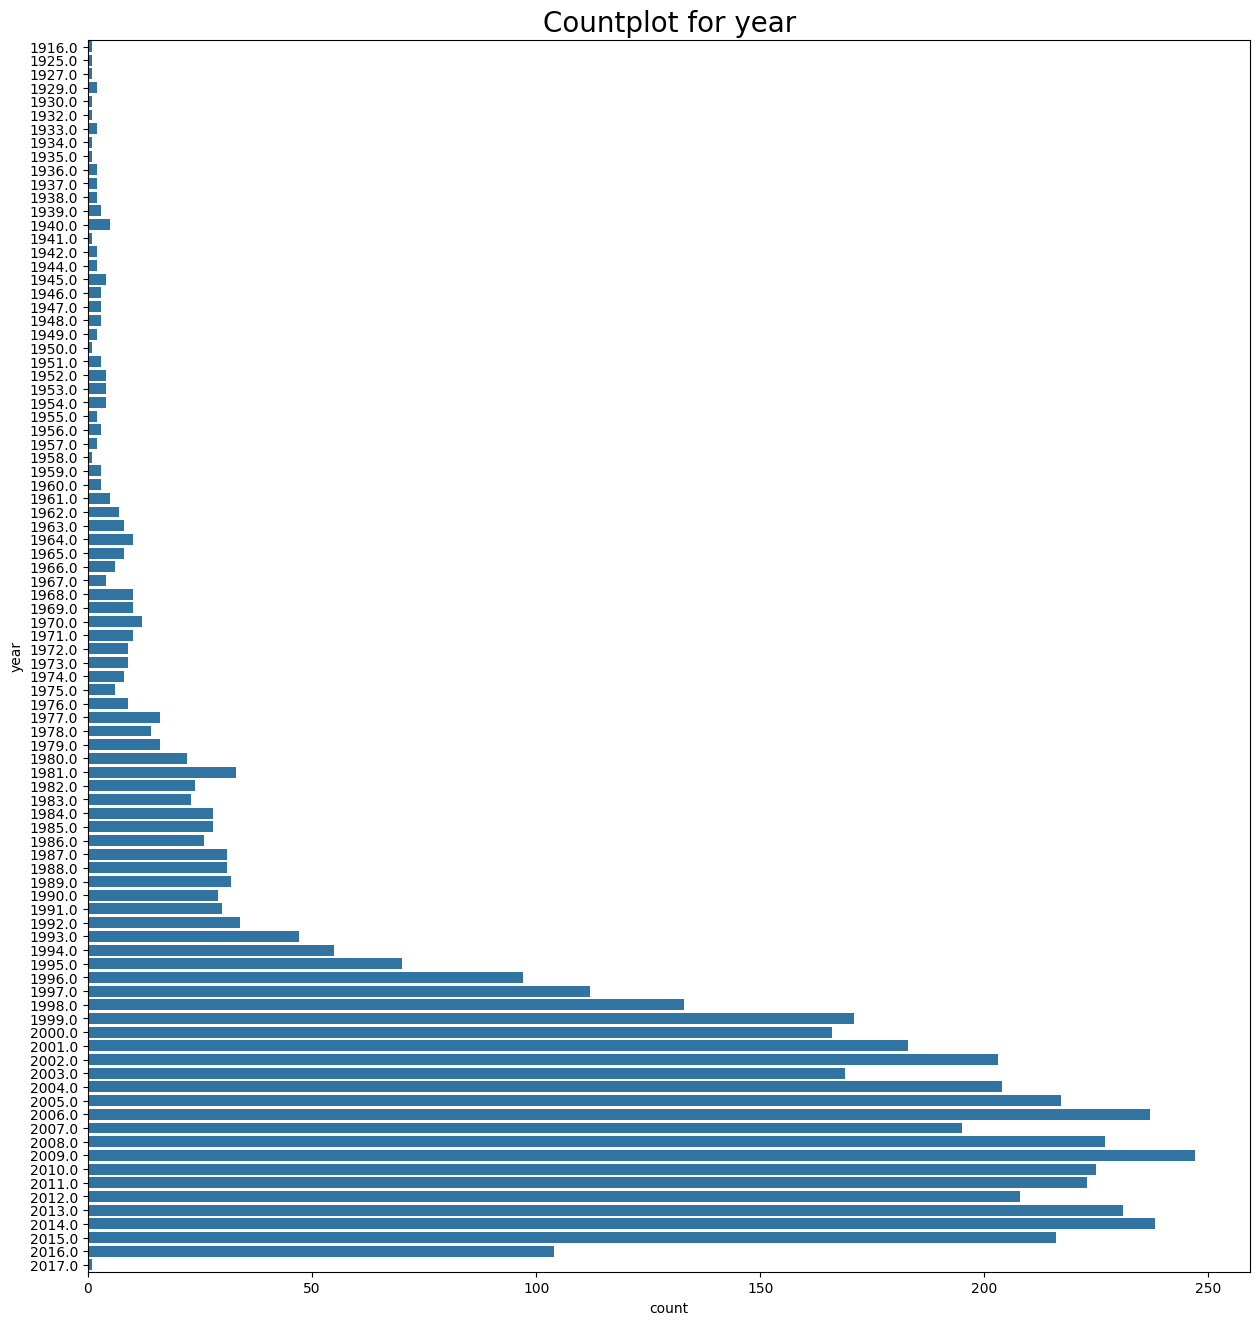

In [12]:
# so its clear that in our dataset we have movies only upto 2017, and most of the movies released in 2009
plt.figure(figsize=[15,16])
sns.countplot(data=df, y='year')
plt.title('Countplot for year', fontsize = 20)
plt.show()

In [13]:
# Now we are not using year column also
df = df.drop("year", axis=1)

In [14]:
# Cheking null values
df.isna().sum()

genres            28
original_title     0
vote_average       0
vote_count         0
cast              43
director          30
dtype: int64

In [15]:
# Filing nan value with blank string
df['genres'] = df['genres'].replace(np.nan," ")
df['cast'] = df['cast'].replace(np.nan," ")
df['director'] = df['director'].replace(np.nan," ")

## Collecting 2018-2024 Movies Data from Wikipedia

##### As we know in our dataset we have movies only upto 2017.

In [16]:
# Scraping 2018-24 movie data from wikipedia.
link1 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
link2 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
link3 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
link4 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"
link5 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"
link6 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"
link7 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2024"

# Q1 (January–March) Q2 (April–June) Q3 (July–September) Q4 (October–December)

df1 = pd.read_html(link1,header=0)[2]
df2 = pd.read_html(link1,header=0)[3]
df3 = pd.read_html(link1,header=0)[4]
df4 = pd.read_html(link1,header=0)[5]

df5 = pd.read_html(link2, header=0)[3]
df6 = pd.read_html(link2, header=0)[4]
df7 = pd.read_html(link2, header=0)[5]
df8 = pd.read_html(link2, header=0)[6]


df9 = pd.read_html(link3, header=0)[3]
df10 = pd.read_html(link3, header=0)[4]
df11 = pd.read_html(link3, header=0)[5]
df12 = pd.read_html(link3, header=0)[6]

df13 = pd.read_html(link4, header=0)[3]
df14 = pd.read_html(link4, header=0)[4]
df15 = pd.read_html(link4, header=0)[5]
df16 = pd.read_html(link4, header=0)[6]

df17 = pd.read_html(link5, header=0)[3]
df18 = pd.read_html(link5, header=0)[4]
df19 = pd.read_html(link5, header=0)[5]
df20 = pd.read_html(link5, header=0)[6]

df21 = pd.read_html(link6, header=0)[3]
df22 = pd.read_html(link6, header=0)[4]
df23 = pd.read_html(link6, header=0)[5]
df24 = pd.read_html(link6, header=0)[6]

df25 = pd.read_html(link7, header=0)[3]
df26 = pd.read_html(link7, header=0)[4]
df27 = pd.read_html(link7, header=0)[5]
df28 = pd.read_html(link7, header=0)[6]

# combine all scraped dataframe in one
frame = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28]
wiki_df = pd.concat(frame).reset_index(drop=True)


In [16]:
#selecting the most relevant columns
wiki_df = wiki_df[["Opening", "Opening.1", "Title", "Production company", "Cast and crew","Ref."]]

In [17]:
wiki_df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,vte2019 films,vte2019 films.1,vte2020 films,vte2020 films.1,vte American films of the 2020s,vte American films of the 2020s.1
0,J A N U A R Y,5.0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,NaN,NaN,NaN,NaN,NaN
1,J A N U A R Y,5.0,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3],NaN,NaN,NaN,NaN,NaN,NaN
2,J A N U A R Y,12.0,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4],NaN,NaN,NaN,NaN,NaN,NaN
3,J A N U A R Y,12.0,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5],NaN,NaN,NaN,NaN,NaN,NaN
4,J A N U A R Y,12.0,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6],NaN,NaN,NaN,NaN,NaN,NaN


#### Extracting some more movie information like genres, vote count, vote average from TMDB API


In Wikipedia's movie tables, we were unable to find information such as movie genres, vote counts, and vote averages. Therefore, I am using the TMDb API to obtain this information.

In [18]:
#tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'

# importing tmdb
from tmdbv3api import TMDb,Movie
import json
import requests #for making HTTP requests

# Creating TMDB Api Object
tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'
tmdb.api_key = 'c6c09d114effb5caac5eba5a761473a2'
tmdb_movie = Movie()

# This Function take movie title and return movie genre, vote_average, vote_count
def get_genre(title):
    try:
        result = tmdb_movie.search(title)
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()

        # Fetching movie genre
        movie_genres = []
        genr_str = " "
        for i in range(0,len(data_json['genres'])):
            movie_genres.append(data_json['genres'][i]['name'])
        genre = genr_str.join(movie_genres)
        
        # Fetching vote average and vote count
        vote_average = data_json['vote_average']
        vote_count = data_json['vote_count']
    except:
        vote_average = np.nan
        vote_count = np.nan
        genre = np.nan
    return genre,vote_average,vote_count




In [19]:
# Now creating genre, vote average, vote count column.
wiki_df['Genre'] = wiki_df['Title'].apply(lambda x:get_genre(x)[0])
wiki_df['Vote_Average'] = wiki_df['Title'].apply(lambda x:get_genre(x)[1])
wiki_df['Vote_Count'] = wiki_df['Title'].apply(lambda x:get_genre(x)[2])

In [20]:
# Now Selecting only usefull feature.
wiki_df2= wiki_df[["Title","Cast and crew","Genre","Vote_Average","Vote_Count"]]
wiki_df2.head()


,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,6.258,2818.0
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Drama Mystery,6.900,18.0
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,6.360,4289.0
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,5.500,482.0
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Crime Thriller,5.600,393.0


In [21]:
# Checking missing value
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
447,NaN,NaN,NaN,NaN,NaN
517,The SpongeBob Movie: Sponge on the Run (Canadi...,"Tim Hill (director/screenplay); Tom Kenny, Awk...",NaN,NaN,NaN
664,NaN,NaN,NaN,NaN,NaN
841,Dating and New York,Jonah Feingold (director/screenplay); Francesc...,NaN,NaN,NaN
960,NaN,NaN,NaN,NaN,NaN
961,NaN,NaN,NaN,NaN,NaN
966,Apollo 10 1⁄2: A Space Age Childhood,Richard Linklater (director/screenplay); Glen ...,NaN,NaN,NaN
1212,NaN,NaN,NaN,NaN,NaN
1213,NaN,NaN,NaN,NaN,NaN
1214,NaN,NaN,NaN,NaN,NaN


In [22]:
wiki_df2 =  wiki_df2.fillna({'Genre':'', 'Vote_Average':0,'Vote_Count':0})


In [23]:
wiki_df2 =  wiki_df2.fillna({'Title':'', 'Cast and crew':''})


In [24]:
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count


### Text Preprocessing.

In [25]:
# Cheking random row values of cast and crew column.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)

Christopher Radcliff (director/screenplay); Lauren Wolkstein (director); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell
Tyler Perry (director/screenplay); Taraji P. Henson, Lyriq Bent, Crystle Stewart, Ptosha Storey, Jazmyn Simon, Ajiona Alexus, Antonio Madison, Bresha Webb, Danielle Nicolet, Nelson Estevez, Kendrick Cross
Erwin brothers (directors); Jon Erwin, Brent McCorkle (screenplay); J. Michael Finley, Madeline Carroll, Trace Adkins, Priscilla Shirer, Cloris Leachman, Dennis Quaid
Bill Holderman (director/screenplay); Erin Simms (screenplay); Diane Keaton, Jane Fonda, Candice Bergen, Mary Steenburgen
Aaron Schneider (director); Tom Hanks (screenplay); Tom Hanks, Stephen Graham, Rob Morgan, Elisabeth Shue


In [26]:
# Text Preprocessing.
preprocessed = []
for sentance in wiki_df2['Cast and crew'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing specific keywords
    sentance = re.sub(r"director","", sentance)
    sentance = re.sub(r"co-director/screenplay","", sentance)
    sentance = re.sub(r"co-/screenplay","", sentance)
    sentance = re.sub(r"screenplay","", sentance)
    sentance = re.sub(r"director/screenplay","", sentance)
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Cast and crew"] = preprocessed


In [27]:
# Now again check random row values of cast and crew column after cleaning.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
sent_6 = wiki_df2['Cast and crew'][605]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)
print("====================================")
print(sent_6)
print("====================================")

christopher radcliff lauren wolkstein alex pettyfer james freedson jackson emily althaus gene jones owen campbell tobias campbell
tyler perry taraji p henson lyriq bent crystle stewart ptosha storey jazmyn simon ajiona alexus antonio madison bresha webb danielle nicolet nelson estevez kendrick cross
erwin brothers s jon erwin brent mccorkle j michael finley madeline carroll trace adkins priscilla shirer cloris leachman dennis quaid
bill holderman erin simms diane keaton jane fonda candice bergen mary steenburgen
aaron schneider tom hanks tom hanks stephen graham rob morgan elisabeth shue
mark tonderai kurt wimmer omari hardwick loretta devine


In [28]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,adam robitel leigh whannell lin shaye angus sa...,Horror Thriller,6.258,2818.0
1,The Strange Ones,christopher radcliff lauren wolkstein alex pet...,Drama Mystery,6.900,18.0
2,The Commuter,jaume collet serra byron willinger philip de b...,Action Thriller Mystery,6.360,4289.0
3,Proud Mary,babak najafi john s newman christian swegal st...,Thriller Action Crime,5.500,482.0
4,Acts of Violence,brett donowho nicolas aaron mezzanatto bruce w...,Action Crime Thriller,5.600,393.0


In [29]:
# Text Preprocessing on movie genre column
preprocessed = []
for sentance in wiki_df2['Genre'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # This line adds the cleaned and processed genre string to the preprocessed list.

    preprocessed.append(sentance) # Update the 'Genre' column with the preprocessed data:
    
wiki_df2["Genre"] = preprocessed

In [30]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,adam robitel leigh whannell lin shaye angus sa...,horror thriller,6.258,2818.0
1,The Strange Ones,christopher radcliff lauren wolkstein alex pet...,drama mystery,6.900,18.0
2,The Commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.360,4289.0
3,Proud Mary,babak najafi john s newman christian swegal st...,thriller action crime,5.500,482.0
4,Acts of Violence,brett donowho nicolas aaron mezzanatto bruce w...,action crime thriller,5.600,393.0


In [31]:

# Text Preprocessing on title column
preprocessed = []
for sentance in wiki_df2['Title'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
       
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Title"] = preprocessed

In [32]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror thriller,6.258,2818.0
1,the strange ones,christopher radcliff lauren wolkstein alex pet...,drama mystery,6.900,18.0
2,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.360,4289.0
3,proud mary,babak najafi john s newman christian swegal st...,thriller action crime,5.500,482.0
4,acts of violence,brett donowho nicolas aaron mezzanatto bruce w...,action crime thriller,5.600,393.0


In [33]:
df.head()


,genres,original_title,vote_average,vote_count,cast,director
0,Action Adventure Fantasy Science Fiction,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [34]:
# First combining cast and director column
df["Cast and crew"] = df['cast'] +' '+ df['director']

# Renaming column
df = df.rename({'original_title':'Title', 'genres':'Genre',
                'vote_average':'Vote_Average', 'vote_count':'Vote_Count'},axis=1)

# Converting all upercase string column to lowercase 
df['Title'] = df['Title'].str.lower()
df['Cast and crew'] = df['Cast and crew'].str.lower()
df['Genre'] = df['Genre'].str.lower()

# re-arange columns
df = df[['Title','Cast and crew','Genre','Vote_Average','Vote_Count']]


In [35]:
# Now combine both main and wiki_df2 dataframe into one
frame = [wiki_df2,df]
final_df = pd.concat(frame).reset_index(drop=True) 

In [36]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror thriller,6.258,2818.0
1,the strange ones,christopher radcliff lauren wolkstein alex pet...,drama mystery,6.900,18.0
2,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.360,4289.0
3,proud mary,babak najafi john s newman christian swegal st...,thriller action crime,5.500,482.0
4,acts of violence,brett donowho nicolas aaron mezzanatto bruce w...,action crime thriller,5.600,393.0


### Model Development

#### 1. Popularity based Recommender

The easiest way to build a recommendation system is by using a popularity-based approach. 
The basic idea is that movies with higher popularity are more likely to be enjoyed by the average audience. This method is straightforward but does not provide personalized recommendations tailored to individual users.

In [37]:
# Selecting feature which is needed to build a simple popularity based recomandation
p_df = final_df[['Title', 'Vote_Average', 'Vote_Count']]
p_df.head()


,Title,Vote_Average,Vote_Count
0,insidious: the last key,6.258,2818.0
1,the strange ones,6.900,18.0
2,the commuter,6.360,4289.0
3,proud mary,5.500,482.0
4,acts of violence,5.600,393.0


### Using Weighted average for each movie's Average Rating

Using average ratings alone as the score for movies can be misleading. For example, a movie with a 9.0 average rating from only 3 votes shouldn't be considered better than a movie with a 7.8 average rating from 40 votes. To address this, we'll use IMDb's weighted rating (WR) formula:

Weighted Rating (WR) = 

Where:
- **v** is the number of votes for the movie
- **m** is the minimum number of votes required to be listed in the chart
- **R** is the average rating of the movie
- **C** is the mean vote across all movies in the report

In [38]:
# calculating all the components based IMDB formula
v= p_df['Vote_Count']
R= p_df['Vote_Average']
C= p_df['Vote_Average'].mean()
m= p_df['Vote_Count'].quantile(0.70)

p_df['Weighted_Average']=((R*v)+ (C*m))/(v+m)


In [39]:
# Finally, let's sort the DataFrame based on the weighted_average score
popular_movies = p_df.sort_values(by='Weighted_Average',ascending=False)


In [40]:
popular_movies.head(10)


,Title,Vote_Average,Vote_Count,Weighted_Average
3613,the shawshank redemption,8.500,8205.0,8.315954
235,spider-man: into the spider-verse,8.405,15153.0,8.305793
75,avengers: infinity war,8.247,29075.0,8.197785
270,avengers: endgame,8.254,25043.0,8.196885
1275,spider-man: across the spider-verse,8.400,6426.0,8.179255
325,the lion king,8.256,17845.0,8.176609
5069,the godfather,8.400,5893.0,8.161328
2394,fight club,8.300,9413.0,8.151294
4964,pulp fiction,8.300,8428.0,8.135194
223,green book,8.242,11281.0,8.119789


In [41]:
# Save preprocessed data
p_df.to_csv('preprocessed_movies.csv', index=False)
popular_movies.head(10).to_csv('top_10_popular_movies.csv', index=False)

## 2. Content Based Recommender

The recommender we built before has some big drawbacks. It gives everyone the same recommendations, ignoring personal tastes. So, if someone loves romantic movies but hates action films, they probably won't enjoy most of the movies in our Top 10 Chart.

To make our recommendations more personal, we'll build an engine that finds movies similar to the ones a user already likes by comparing certain features. This approach is called Content-Based Filtering because it uses movie details to make suggestions.

For example, if someone loves "Dilwale Dulhania Le Jayenge," "My Name is Khan," and "Kabhi Khushi Kabhi Gham," we can guess they enjoy movies with Shahrukh Khan and directed by Karan Johar. Even if they check out the romance chart, these might not show up as top picks.

To better tailor our recommendations, we'll use movie metadata to find and suggest films similar to the ones a user likes. This way, we can give recommendations that match individual tastes more accurately.

In [42]:
# we have done most of the text preprocessing in previous steps.
final_df.head()


,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror thriller,6.258,2818.0
1,the strange ones,christopher radcliff lauren wolkstein alex pet...,drama mystery,6.900,18.0
2,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.360,4289.0
3,proud mary,babak najafi john s newman christian swegal st...,thriller action crime,5.500,482.0
4,acts of violence,brett donowho nicolas aaron mezzanatto bruce w...,action crime thriller,5.600,393.0


In [43]:
# concatinate all these columns and create one seprate column for them
final_df['Combined_Features'] = final_df['Cast and crew'] +' '+ final_df['Genre']

In [44]:
final_df['Combined_Features'].head()

0    adam robitel leigh whannell lin shaye angus sa...
1    christopher radcliff lauren wolkstein alex pet...
2    jaume collet serra byron willinger philip de b...
3    babak najafi john s newman christian swegal st...
4    brett donowho nicolas aaron mezzanatto bruce w...
Name: Combined_Features, dtype: object

CountVectorizer : 
can help us compute the count of unique words across a number of texts with ease. 
CountVectorizer is a class in scikit-learn that transforms a collection of text documents into a numerical matrix of word or token counts. This class has a number of parameters that can also assist in text preprocessing tasks, such as stop word removal, word count thresholds (i.e. maximums and minimums), vocab limits, n-gram creation and more. 

In [1]:
'''
cv.fit_transform(...) does two things:
Fit: It learns the vocabulary dictionary of all tokens (words) in the Combined_Features column.

Transform: It transforms the text data into a sparse matrix where each row represents a movie, 
and each column represents a token (word) from the combined features. 
The values in the matrix are the counts of each token in the corresponding movie's combined features.
'''

"\ncv.fit_transform(...) does two things:\nFit: It learns the vocabulary dictionary of all tokens (words) in the Combined_Features column.\n\nTransform: It transforms the text data into a sparse matrix where each row represents a movie, \nand each column represents a token (word) from the combined features. \nThe values in the matrix are the counts of each token in the corresponding movie's combined features.\n"

In [45]:
# Create count matrix from this new combined column
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(final_df["Combined_Features"])

In [46]:
# Now Compute the Cosine Similarity based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [47]:
# This Function takes movie title as input and return 15 most similar movies.
# This function is also capable for correcting user input spell.
def get_recomandation_contentBase(title):
    
    # Converting uppercase into lower -  ensure case-insensitive matching.
    title = title.lower()
    
    # Correcting user input spell (close match from our movie list) - also insures spell checking
    title = get_close_matches(title, final_df['Title'].values, n=3, cutoff=0.6)[0]
    
    # Get the index of the movie that matches the title
    idx = final_df['Title'][final_df['Title']==title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie in descending order. This means the most similar movies will be at the top of the list.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1],reverse=True)
    
    # Get the scores of the 15 most similar movies
    sim_scores = sim_scores[1:16]
    
    for i in sim_scores:
        movie_index = i[0]
        print(final_df['Title'].iloc[movie_index])

In [48]:
# Now lets make predictions like oppenheimer
get_recomandation_contentBase("anyone but you")

anyone but you
hit man
the family stone
me you and five bucks
my best friend's wedding
wendy and lucy
friends with benefits
the wedding date
love hard
must love dogs
georgia rule
two can play that game
among giants
tall girl
do revenge
someone great


In [49]:
final_df.to_csv('final_movies.csv', index=False)

In [50]:
np.save('cosine_sim.npy', cosine_sim)

## 3. Collaborative filtering


Collaborative filtering is a method used in recommendation systems to predict the interests of a user by collecting preferences from many users. The fundamental idea is that if users have agreed in the past, they will agree in the future.
 Here’s a detailed breakdown of how it works:
 For example, if the user ‘A’ likes ‘Coldplay’, ‘The Linkin Park’ and ‘Britney Spears’ while the user ‘B’ likes ‘Coldplay’, ‘The Linkin Park’ and ‘Taylor Swift’ then they have similar interests. So, there is a huge probability that the user ‘A’ would like ‘Taylor Swift’ and the user ‘B’ would like ‘Britney Spears’. 
 This is the way collaborative filtering is done.

 

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective).

### Types of Collaborative Filtering
1. **User-Based Collaborative Filtering**:
   - **Concept**: This method recommends items to a user based on the preferences of similar users.
   - **Process**:
     1. **Identify Similar Users**: Find users who have rated or interacted with items in a similar way to the target user.
     2. **Aggregate Preferences**: Compile the preferences of these similar users.
     3. **Make Recommendations**: Recommend items that these similar users have liked but the target user hasn’t interacted with yet.

2. **Item-Based Collaborative Filtering**:
   - **Concept**: This method recommends items similar to those a user has liked in the past.
   - **Process**:
     1. **Identify Similar Items**: Find items that have been rated similarly by users who have rated the same items as the target user.
     2. **Aggregate Preferences**: Compile ratings or interactions of these similar items.
     3. **Make Recommendations**: Recommend items that are similar to those the target user has liked.

Note: Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset

In [2]:
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:

#We can merge them together
data = pd.merge(ratings,movies,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
#Selecting usefull features
data = data[['movieId','title','userId','rating']]
data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,3,Grumpier Old Men (1995),1,4.0
2,6,Heat (1995),1,4.0
3,47,Seven (a.k.a. Se7en) (1995),1,5.0
4,50,"Usual Suspects, The (1995)",1,5.0


In [7]:
n_users = data['userId'].nunique()
n_items = data['movieId'].nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))


Num. of Users: 610
Num of Movies: 9724


In [8]:
#groupby title and count how many people rated each and every movie & reseting index because I dont want title to be my index.
movie_rating_count = pd.DataFrame(data.groupby('title')['rating'].count().reset_index())
movie_rating_count = movie_rating_count.rename(columns={'rating':'total rating count'})
movie_rating_count.head()


,title,total rating count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [9]:
#adding new column called total rating count
rating_with_totalRatingCount = pd.merge(data,movie_rating_count,on='title')
rating_with_totalRatingCount.head()

,movieId,title,userId,rating,total rating count
0,1,Toy Story (1995),1,4.0,215
1,3,Grumpier Old Men (1995),1,4.0,52
2,6,Heat (1995),1,4.0,102
3,47,Seven (a.k.a. Se7en) (1995),1,5.0,203
4,50,"Usual Suspects, The (1995)",1,5.0,204


In [10]:

#only taking those movie whose total rating count is greater than 50
rating_popular_movie = rating_with_totalRatingCount[rating_with_totalRatingCount['total rating count']>=50]

In [11]:
rating_popular_movie.head()

,movieId,title,userId,rating,total rating count
0,1,Toy Story (1995),1,4.0,215
1,3,Grumpier Old Men (1995),1,4.0,52
2,6,Heat (1995),1,4.0,102
3,47,Seven (a.k.a. Se7en) (1995),1,5.0,203
4,50,"Usual Suspects, The (1995)",1,5.0,204


Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [12]:
# creating pivot table
movie_feature_df = rating_with_totalRatingCount.pivot_table(index='userId',columns='title',values='rating').fillna(0)
movie_feature_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The similarity can be computed with Pearson Correlation or Cosine Similarity. I am using "Pearson Correlation" in user-to-user cf and "Cosine Similarity" in item-to-item cf

### User-User collaborative filtering

In [13]:
user_similarity = movie_feature_df.corr()

In [14]:
#Function that takes in movie title and ratings as input and outputs most similar movies
def get_recomandation(movie_name,ratings):
    similar_score = user_similarity[movie_name]*(ratings-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score


In [15]:
#Now lets make predictions
get_recomandation('Toy Story (1995)',2).head(10)

title
Man from Earth, The (2007)                       0.040539
Wild Tales (2014)                                0.039545
Intouchables (2011)                              0.037117
Hunt, The (Jagten) (2012)                        0.033501
Incendies (2010)                                 0.032223
Planet Earth II (2016)                           0.031829
The Lair of the White Worm (1988)                0.028170
Departures (Okuribito) (2008)                    0.025979
Sacrifice, The (Offret - Sacraficatio) (1986)    0.025034
Sing Street (2016)                               0.025027
Name: Toy Story (1995), dtype: float64

### Item-Item collaborative filtering

In [16]:
item_similarity = cosine_similarity(movie_feature_df.T)
item_similarity_df = pd.DataFrame(item_similarity,index=movie_feature_df.columns,columns=movie_feature_df.columns)


In [17]:
# Function that takes in movie title and ratings as input and outputs most similar movies
def get_recomandation2(movie_name,ratings):
    similar_score = item_similarity_df[movie_name]*(ratings-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

In [18]:
# Now lets make predictions
get_recomandation2('Toy Story (1995)',3).head(10)

title
Toy Story (1995)                                     0.500000
Toy Story 2 (1999)                                   0.286301
Jurassic Park (1993)                                 0.282818
Independence Day (a.k.a. ID4) (1996)                 0.282131
Star Wars: Episode IV - A New Hope (1977)            0.278694
Forrest Gump (1994)                                  0.273548
Lion King, The (1994)                                0.270573
Star Wars: Episode VI - Return of the Jedi (1983)    0.270545
Mission: Impossible (1996)                           0.269456
Groundhog Day (1993)                                 0.267084
Name: Toy Story (1995), dtype: float64

In [19]:
user_similarity.to_pickle('user_similarity.pkl')

In [20]:
item_similarity_df.to_pickle('item_similarity_df.pkl')

In [21]:
# Create functions to load the models:

def load_preprocessed_data():
    return pd.read_csv('preprocessed_movies.csv')

def load_popular_movies():
    return pd.read_csv('top_10_popular_movies.csv')

def load_content_based_data():
    final_df = pd.read_csv('final_movies.csv')
    cosine_sim = np.load('cosine_sim.npy')
    return final_df, cosine_sim

def load_collaborative_data():
    user_similarity = pd.read_pickle('user_similarity.pkl')
    item_similarity_df = pd.read_pickle('item_similarity_df.pkl')
    return user_similarity, item_similarity_df

In [22]:
# Modify your recommendation functions to use the loaded data:
def get_recommendation_content_based(title, final_df, cosine_sim):
    title = title.lower()
    title = get_close_matches(title, final_df['Title'].values, n=3, cutoff=0.6)[0]
    idx = final_df['Title'][final_df['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:16]
    return [final_df['Title'].iloc[i[0]] for i in sim_scores]

def get_recommendation_collaborative(movie_name, ratings, similarity_df):
    similar_score = similarity_df[movie_name] * (ratings - 2.5)
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score